In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from pathlib import Path

In [19]:
data_path = Path("../data/ushichka")

In [20]:
# from src.pyushichka.load_data import download_raw
# download_raw(data_path)

In [21]:

from src.pyushichka.load_data import loadImage, loadImageUndistorted, loadCalibration

In [22]:
recording = "2018-07-21"
images = [loadImageUndistorted(cam,0, str(data_path / recording )) for cam in range(0,3)]
calibrations = [loadCalibration(cam, str(data_path / recording)) for cam in range(0,3)]

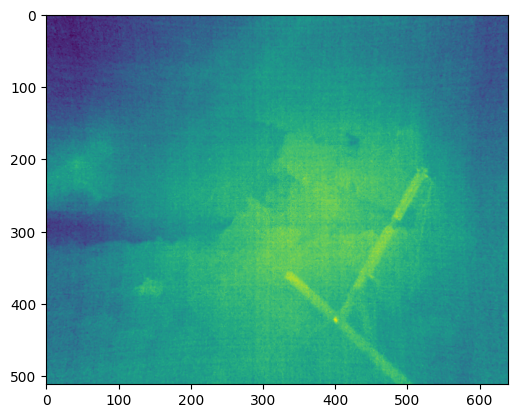

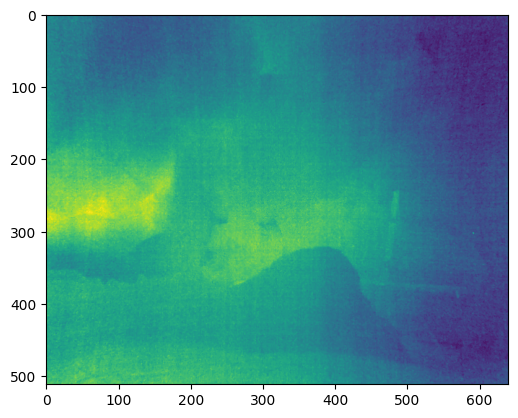

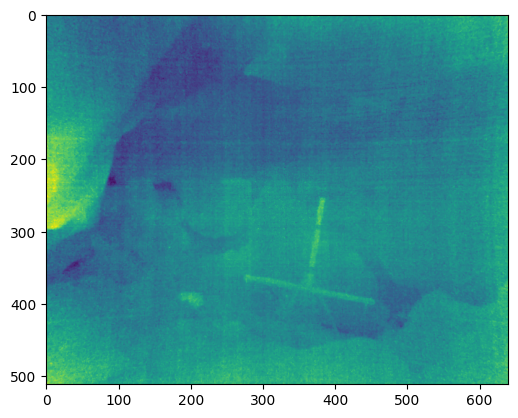

[None, None, None]

In [23]:
import matplotlib.pyplot as plt

def show_img(img):
    plt.figure()
    plt.imshow(img)
    plt.show()

[show_img(x) for x in images]

In [24]:
import imageio
import numpy as np

In [25]:
def convert_grayscale_png(img):
    rgb_grayscale = np.zeros(shape=(img.shape[0], img.shape[1], 3))
    for i in range(0,rgb_grayscale.shape[2]):
        rgb_grayscale[:,:,i] = img

    maxv = img.max()
    minv = img.min()

    rgb_grayscale = (rgb_grayscale - minv) / float(maxv-minv)
    rgb_grayscale.max(), rgb_grayscale.min()
    rgb_grayscale = rgb_grayscale * 255
    return rgb_grayscale.astype(np.uint8)

In [26]:
img = convert_grayscale_png(images[0])[:,:,0]
img

array([[ 26,  26,  38, ...,  56,  63,  88],
       [ 21,  25,  34, ...,  65,  74,  78],
       [ 23,  24,  29, ...,  75,  78,  79],
       ...,
       [114, 116, 118, ..., 128, 131, 127],
       [120, 117, 121, ..., 127, 130, 131],
       [122, 115, 121, ..., 129, 129, 129]], dtype=uint8)

In [27]:
for i in range(len(images)):
    imageio.imwrite(f"../data/images/image_0{i}.png",convert_grayscale_png(images[i]))

In [30]:
import numpy as np
from src.pycv.perspective import decompose_perspective_projection_matrix
import pandas as pd
from scipy.spatial.transform import Rotation

In [44]:
Ps = [c[1] for c in calibrations]
calib_path = Path("../data/calib")
calib_path.mkdir(exist_ok=True)
[np.savetxt( calib_path / f"P_{i:02d}.csv", Ps[i]) for i in range(len(Ps))]

[None, None, None]

In [31]:
def calib_to_colmap(calib):
    K, P = calib
    K_dec, R, T = decompose_perspective_projection_matrix(P)
    Q = Rotation.from_matrix(R).as_quat()
    return K, Q, T
colmap_calibs = [{"K": K, "Q": Q, "T": T} for K,Q,T in [calib_to_colmap(c) for c in calibrations]]

In [32]:
for c in colmap_calibs:
    K, Q, T = c.values()
    print("K")
    print(f"{K}")
    print("Q")
    print(f"{Q}")
    print("T")
    print(f"{T}")
    print("---")


K
[[526.   0. 320.]
 [  0. 526. 256.]
 [  0.   0.   1.]]
Q
[-0.48082831 -0.06479432  0.87425568  0.01681773]
T
[-3.79414481 -0.33942207  1.72733909]
---
K
[[526.   0. 320.]
 [  0. 526. 256.]
 [  0.   0.   1.]]
Q
[-0.20623407  0.08920056  0.97065492 -0.08567258]
T
[-1.97929947  1.17276346  5.3929666 ]
---
K
[[526.   0. 320.]
 [  0. 526. 256.]
 [  0.   0.   1.]]
Q
[-0.00248735 -0.00142496  0.99997835 -0.00592372]
T
[-0.48899949 -0.1048561   5.70027936]
---


In [ ]:
Q